# sci-analysis

An easy to use and powerful python-based data exploration and analysis tool

## Current Version

2.2 --- Released January 5, 2019

### What is sci-analysis?

sci-analysis is a python package for quickly performing exploratory data analysis (EDA). It aims to make performing EDA easier for newcomers and experienced data analysts alike by abstracting away the specific SciPy, NumPy, and Matplotlib commands. This is accomplished by using sci-analysis's ``analyze()`` function.

The main features of sci-analysis are:
* Fast EDA with the analyze() function.
* Great looking graphs without writing several lines of matplotlib code.
* Automatic use of the most appropriate hypothesis test for the supplied data.
* Automatic handling of missing values.

Currently, sci-analysis is capable of performing four common statistical analysis techniques:
* Histograms and summary of numeric data
* Histograms and frequency of categorical data
* Bivariate and linear regression analysis
* Location testing

### What's new in sci-analysis version 2.2?

* Version 2.2 adds the ability to add data labels to scatter plots.
* The default behavior of the histogram and statistics was changed from assuming a sample, to assuming a population.
* Fixed a bug involving the Mann Whitney U test, where the minimum size was set incorrectly.
* Verified compatibility with python 3.7.

### Getting started with sci-analysis

sci-analysis requires python 2.7, 3.5, 3.6, or 3.7.

If one of these four version of python is already installed then this section can be skipped.

If you use MacOS or Linux, python should already be installed. You can check by opening a terminal window and typing ``which python`` on the command line. To verify what version of python you have installed, type ``python --version`` at the command line. If the version is 2.7.x, 3.5.x, 3.6.x, or 3.7.x where x is any number, sci-analysis should work properly.

> Note: It is not recommended to use sci-analysis with the system installed python. This is because the version of python that comes with your OS will require root permission to manage, might be changed when upgrading the OS, and can break your OS if critical packages are accidentally removed. More info on why the system python should not be used can be found here: https://github.com/MacPython/wiki/wiki/Which-Python

If you are on Windows, you might need to install python. You can check to see if python is installed by clicking the Start button, typing ``cmd`` in the run text box, then type ``python.exe`` on the command line. If you receive an error message, you need to install python. 

The easiest way to install python on any OS is by installing Anaconda or Mini-conda from this page:

<https://www.continuum.io/downloads>

If you are on MacOS and have GCC installed, python can be installed with homebrew using the command:
```
brew install python
```

If you are on Linux, python can be installed with pyenv using the instructions here:
<https://github.com/pyenv/pyenv>

If you are on Windows, you can download the python binary from the following page, but be warned that compiling the required packages will be required using this method:

<https://www.python.org/downloads/windows/>

### Installing sci-analysis

sci-analysis can be installed with pip by typing the following:

```
pip install sci-analysis
```

On Linux, you can install pip from your OS package manager. If you have Anaconda or Mini-conda, pip should already be installed. Otherwise, you can download pip from the following page:

<https://pypi.python.org/pypi/pip>

sci-analysis works best in conjunction with the excellent pandas and jupyter notebook python packages. If you don't have either of these packages installed, you can install them by typing the following:

```
pip install pandas
pip install jupyter
```

### Using sci-analysis

From the python interpreter or in the first cell of a Jupyter notebook, type:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy.stats as st
from sci_analysis import analyze

This will tell python to import the sci-analysis function ``analyze()``.

> Note: Alternatively, the function ``analyse()`` can be imported instead, as it is an alias for ``analyze()``. For the case of this documentation, ``analyze()`` will be used for consistency.

If you are using sci-analysis in a Jupyter notebook, you need to use the following code instead to enable inline plots:

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as st
from sci_analysis import analyze

Now, sci-analysis should be ready to use. Try the following code:

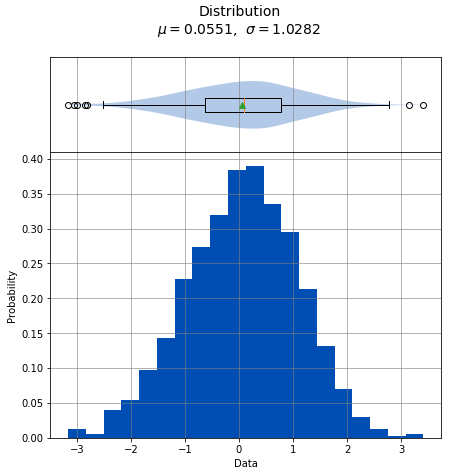



Statistics
----------

n         =  1000
Mean      =  0.0551
Std Dev   =  1.0282
Std Error =  0.0325
Skewness  = -0.1439
Kurtosis  = -0.0931
Maximum   =  3.4087
75%       =  0.7763
50%       =  0.0897
25%       = -0.6324
Minimum   = -3.1586
IQR       =  1.4087
Range     =  6.5673


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9979
p value =  0.2591

H0: Data is normally distributed



In [3]:
np.random.seed(987654321)
data = st.norm.rvs(size=1000)
analyze(xdata=data)

A histogram, box plot, summary stats, and test for normality of the data should appear above. 

> Note: numpy and scipy.stats were only imported for the purpose of the above example. sci-analysis uses numpy and scipy internally, so it isn't necessary to import them unless you want to explicitly use them. 

A histogram and statistics for categorical data can be performed with the following command:

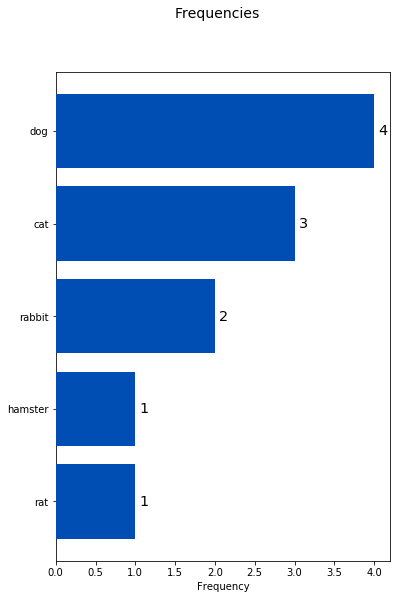



Overall Statistics
------------------

Total            =  11
Number of Groups =  5


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             4              36.3636      dog           
2             3              27.2727      cat           
3             2              18.1818      rabbit        
4             1              9.0909       hamster       
4             1              9.0909       rat           


In [4]:
pets = ['dog', 'cat', 'rat', 'cat', 'rabbit', 'dog', 'hamster', 'cat', 'rabbit', 'dog', 'dog']
analyze(pets)

Let's examine the ``analyze()`` function in more detail. Here's the signature for the ``analyze()`` function:

In [5]:
from inspect import signature
print(analyze.__name__, signature(analyze))
print(analyze.__doc__)

analyze (xdata, ydata=None, groups=None, labels=None, alpha=0.05, **kwargs)

    Automatically performs a statistical analysis based on the input arguments.

    Parameters
    ----------
    xdata : array-like
        The primary set of data.
    ydata : array-like
        The response or secondary set of data.
    groups : array-like
        The group names used for location testing or Bivariate analysis.
    labels : array-like or None
        The sequence of data point labels.
    alpha : float
        The sensitivity to use for hypothesis tests.

    Returns
    -------
    xdata, ydata : tuple(array-like, array-like)
        The input xdata and ydata.

    Notes
    -----
    xdata : array-like(num), ydata : None --- Distribution
    xdata : array-like(str), ydata : None --- Frequencies
    xdata : array-like(num), ydata : array-like(num) --- Bivariate
    xdata : array-like(num), ydata : array-like(num), groups : array-like --- Group Bivariate
    xdata : list(array-like(num)), 

``analyze()`` will detect the desired type of data analysis to perform based on whether the ``ydata`` argument is supplied, and whether the ``xdata`` argument is a two-dimensional array-like object. 

The ``xdata`` and ``ydata`` arguments can accept most python array-like objects, with the exception of strings. For example, ``xdata`` will accept a python list, tuple, numpy array, or a pandas Series object. Internally, iterable objects are converted to a Vector object, which is a pandas Series of type ``float64``.

> Note: A one-dimensional list, tuple, numpy array, or pandas Series object will all be referred to as a vector throughout the documentation.

If only the ``xdata`` argument is passed and it is a one-dimensional vector of numeric values, the analysis performed will be a histogram of the vector with basic statistics and Shapiro-Wilk normality test. This is useful for visualizing the distribution of the vector. If only the ``xdata`` argument is passed and it is a one-dimensional vector of categorical (string) values, the analysis performed will be a histogram of categories with rank, frequencies and percentages displayed.

If ``xdata`` and ``ydata`` are supplied and are both equal length one-dimensional vectors of numeric data, an x/y scatter plot with line fit will be graphed and the correlation between the two vectors will be calculated. If there are non-numeric or missing values in either vector, they will be ignored. Only values that are numeric in each vector, at the same index will be included in the correlation. For example, the two following two vectors will yield:


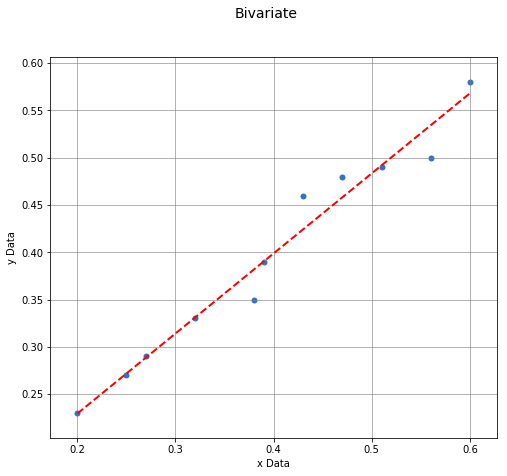



Linear Regression
-----------------

n         =  11
Slope     =  0.8467
Intercept =  0.0601
r         =  0.9836
r^2       =  0.9674
Std Err   =  0.0518
p value   =  0.0000



Pearson Correlation Coefficient
-------------------------------

alpha   =  0.0500
r value =  0.9836
p value =  0.0000

HA: There is a significant relationship between predictor and response



In [6]:
example1 = [0.2, 0.25, 0.27, np.nan, 0.32, 0.38, 0.39, np.nan, 0.42, 0.43, 0.47, 0.51, 0.52, 0.56, 0.6]
example2 = [0.23, 0.27, 0.29, np.nan, 0.33, 0.35, 0.39, 0.42, np.nan, 0.46, 0.48, 0.49, np.nan, 0.5, 0.58]
analyze(example1, example2)

If ``xdata`` is a sequence or dictionary of vectors, a location test and summary statistics for each vector will be performed. If each vector is normally distributed and they all have equal variance, a one-way ANOVA is performed. If the data is not normally distributed or the vectors do not have equal variance, a non-parametric Kruskal-Wallis test will be performed instead of a one-way ANOVA.

> Note: Vectors should be independent from one another --- that is to say, there shouldn't be values in one vector that are derived from or some how related to a value in another vector. These dependencies can lead to weird and often unpredictable results. 

A proper use case for a location test would be if you had a table with measurement data for multiple groups, such as test scores per class, average height per country or measurements per trial run, where the classes, countries, and trials are the groups. In this case, each group should be represented by it's own vector, which are then all wrapped in a dictionary or sequence. 

If ``xdata`` is supplied as a dictionary, the keys are the names of the groups and the values are the array-like objects that represent the vectors. Alternatively, ``xdata`` can be a python sequence of the vectors and the ``groups`` argument a list of strings of the group names. The order of the group names should match the order of the vectors passed to ``xdata``. 

> Note: Passing the data for each group into ``xdata`` as a sequence or dictionary is often referred to as "unstacked" data. With unstacked data, the values for each group are in their own vector. Alternatively, if values are in one vector and group names in another vector of equal length, this format is referred to as "stacked" data. The ``analyze()`` function can handle either stacked or unstacked data depending on which is most convenient.

For example:

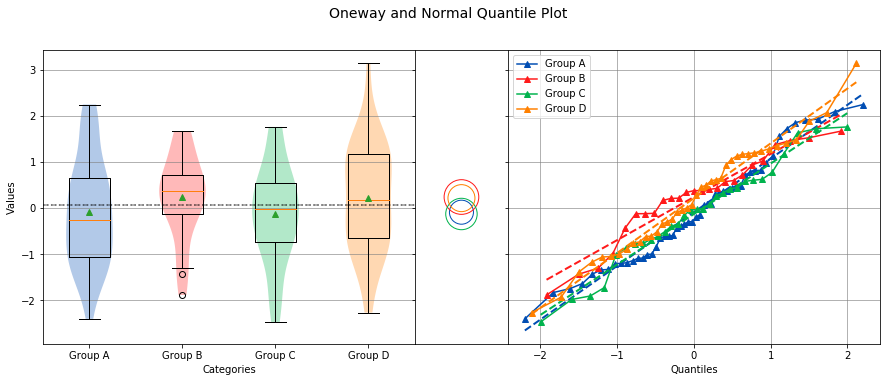



Overall Statistics
------------------

Number of Groups =  4
Total            =  145
Grand Mean       =  0.0598
Pooled Std Dev   =  1.0992
Grand Median     =  0.0741


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
50            -0.0891        1.1473       -2.4036       -0.2490        2.2466       Group A       
25             0.2403        0.9181       -1.8853        0.3791        1.6715       Group B       
30            -0.1282        1.0652       -2.4718       -0.0266        1.7617       Group C       
40             0.2159        1.1629       -2.2678        0.1747        3.1400       Group D       


Bartlett Test
-------------

alpha   =  0.0500
T value =  1.8588
p value =  0.6022

H0: Variances are equal



Oneway ANOVA
------------

alpha   =  0.0500
f value =  1.0813
p value =  0.3591

H0: Gr

In [7]:
np.random.seed(987654321)
group_a = st.norm.rvs(size=50)
group_b = st.norm.rvs(size=25)
group_c = st.norm.rvs(size=30)
group_d = st.norm.rvs(size=40)
analyze({"Group A": group_a, "Group B": group_b, "Group C": group_c, "Group D": group_d})

In the example above, sci-analysis is telling us the four groups are normally distributed (by use of the Bartlett Test, Oneway ANOVA and the near straight line fit on the quantile plot), the groups have equal variance and the groups have matching means. The only significant difference between the four groups is the sample size we specified. Let's try another example, but this time change the variance of group B:

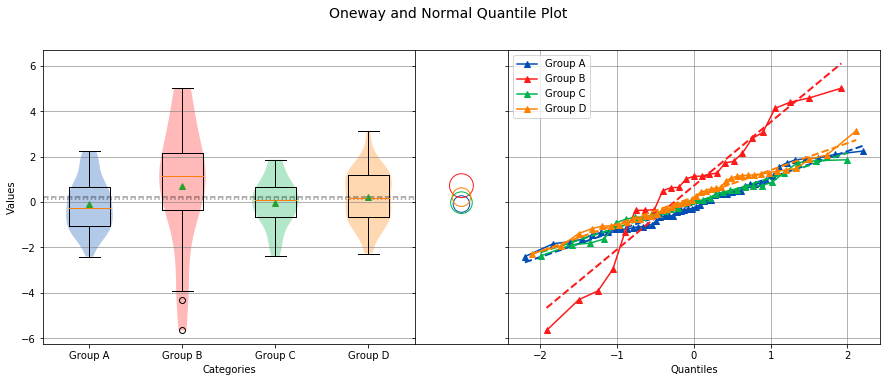



Overall Statistics
------------------

Number of Groups =  4
Total            =  145
Grand Mean       =  0.2049
Pooled Std Dev   =  1.5350
Grand Median     =  0.1241


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
50            -0.0891        1.1473       -2.4036       -0.2490        2.2466       Group A       
25             0.7209        2.7543       -5.6558        1.1374        5.0146       Group B       
30            -0.0282        1.0652       -2.3718        0.0734        1.8617       Group C       
40             0.2159        1.1629       -2.2678        0.1747        3.1400       Group D       


Bartlett Test
-------------

alpha   =  0.0500
T value =  42.7597
p value =  0.0000

HA: Variances are not equal



Kruskal-Wallis
--------------

alpha   =  0.0500
h value =  7.1942
p value =  0.066

In [8]:
np.random.seed(987654321)
group_a = st.norm.rvs(0.0, 1, size=50)
group_b = st.norm.rvs(0.0, 3, size=25)
group_c = st.norm.rvs(0.1, 1, size=30)
group_d = st.norm.rvs(0.0, 1, size=40)
analyze({"Group A": group_a, "Group B": group_b, "Group C": group_c, "Group D": group_d})

In the example above, group B has a standard deviation of 2.75 compared to the other groups that are approximately 1. The quantile plot on the right also shows group B has a much steeper slope compared to the other groups, implying a larger variance. Also, the Kruskal-Wallis test was used instead of the Oneway ANOVA because the pre-requisite of equal variance was not met.

In another example, let's compare groups that have different distributions and different means:

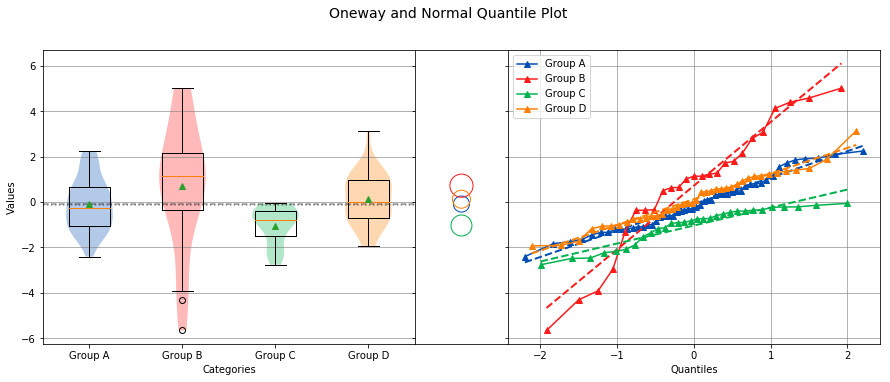



Overall Statistics
------------------

Number of Groups =  4
Total            =  145
Grand Mean       = -0.0694
Pooled Std Dev   =  1.4903
Grand Median     = -0.1148


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
50            -0.0891        1.1473       -2.4036       -0.2490        2.2466       Group A       
25             0.7209        2.7543       -5.6558        1.1374        5.0146       Group B       
30            -1.0340        0.8029       -2.7632       -0.7856       -0.0606       Group C       
40             0.1246        1.1081       -1.9334        0.0193        3.1400       Group D       


Levene Test
-----------

alpha   =  0.0500
W value =  10.1675
p value =  0.0000

HA: Variances are not equal



Kruskal-Wallis
--------------

alpha   =  0.0500
h value =  23.8694
p value =  0.0000



In [9]:
np.random.seed(987654321)
group_a = st.norm.rvs(0.0, 1, size=50)
group_b = st.norm.rvs(0.0, 3, size=25)
group_c = st.weibull_max.rvs(1.2, size=30)
group_d = st.norm.rvs(0.0, 1, size=40)
analyze({"Group A": group_a, "Group B": group_b, "Group C": group_c, "Group D": group_d})

The above example models group C as a Weibull distribution, while the other groups are normally distributed. You can see the difference in the distributions by the one-sided tail on the group C boxplot, and the curved shape of group C on the quantile plot. Group C also has significantly the lowest mean as indicated by the Tukey-Kramer circles and the Kruskal-Wallis test.

### Using sci-analysis with pandas

Pandas is a python package that simplifies working with tabular or relational data. Because columns and rows of data in a pandas DataFrame are naturally array-like, using pandas with sci-analysis is the preferred way to use sci-analysis.

Let's create a pandas DataFrame to use for analysis:

In [10]:
import pandas as pd
np.random.seed(987654321)
df = pd.DataFrame(
    {
        'ID'        : np.random.randint(10000, 50000, size=60).astype(str),
        'One'       : st.norm.rvs(0.0, 1, size=60),
        'Two'       : st.norm.rvs(0.0, 3, size=60),
        'Three'     : st.weibull_max.rvs(1.2, size=60),
        'Four'      : st.norm.rvs(0.0, 1, size=60),
        'Month'     : ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * 5,
        'Condition' : ['Group A', 'Group B', 'Group C', 'Group D'] * 15
    }
)
df

,ID,One,Two,Three,Four,Month,Condition
0,33815,-1.199973,-0.051015,-0.556609,-1.145177,Jan,Group A
1,49378,-0.142682,3.522920,-1.424446,-0.880138,Feb,Group B
2,21015,-1.746777,-7.415294,-1.804494,-0.487270,Mar,Group C
3,15552,-0.437626,0.805884,-1.235840,0.416363,Apr,Group D
4,38833,-1.205166,-0.105672,-1.683723,-0.151296,May,Group A
5,13561,-0.610066,-1.842630,-1.280547,0.645674,Jun,Group B
6,36967,-0.203453,2.323542,-1.326379,1.014516,Jul,Group C
7,43379,0.085310,-2.053241,-0.503970,-1.349427,Aug,Group D
8,36113,1.853726,-5.176661,-1.935414,0.513536,Sep,Group A
9,18422,-0.614827,1.266392,-0.292610,-2.234853,Oct,Group B


This creates a table (pandas DataFrame object) with 6 columns and an index which is the row id. The following command can be used to analyze the distribution of the column titled **One**:

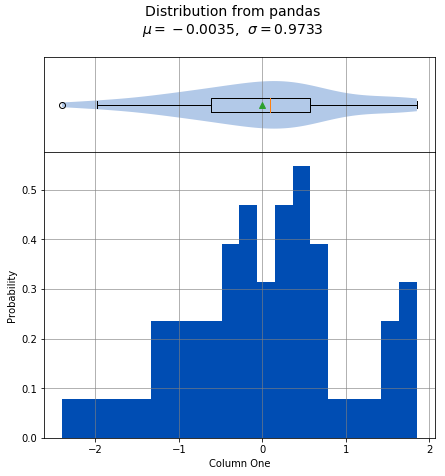



Statistics
----------

n         =  60
Mean      = -0.0035
Std Dev   =  0.9733
Std Error =  0.1257
Skewness  = -0.1472
Kurtosis  = -0.2412
Maximum   =  1.8537
75%       =  0.5745
50%       =  0.0882
25%       = -0.6113
Minimum   = -2.4036
IQR       =  1.1858
Range     =  4.2573


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9804
p value =  0.4460

H0: Data is normally distributed



In [11]:
analyze(
    df['One'], 
    name='Column One', 
    title='Distribution from pandas'
)

Anywhere you use a python list or numpy Array in sci-analysis, you can use a column or row of a pandas DataFrame (known in pandas terms as a Series). This is because a pandas Series has much of the same behavior as a numpy Array, causing sci-analysis to handle a pandas Series as if it were a numpy Array.

By passing two array-like arguments to the ``analyze()`` function, the correlation can be determined between the two array-like arguments. The following command can be used to analyze the correlation between columns **One** and **Three**:

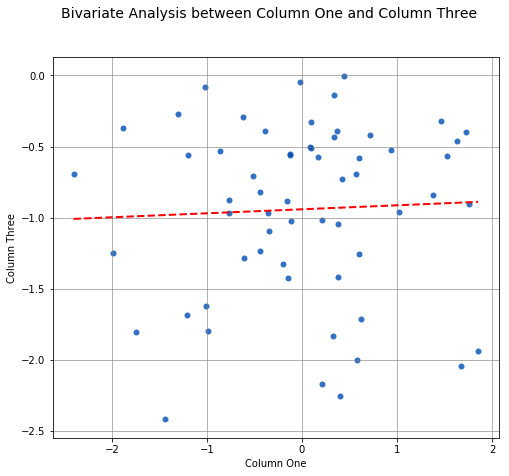



Linear Regression
-----------------

n         =  60
Slope     =  0.0281
Intercept = -0.9407
r         =  0.0449
r^2       =  0.0020
Std Err   =  0.0820
p value   =  0.7332



Spearman Correlation Coefficient
--------------------------------

alpha   =  0.0500
r value =  0.0316
p value =  0.8105

H0: There is no significant relationship between predictor and response



In [12]:
analyze(
    df['One'], 
    df['Three'], 
    xname='Column One', 
    yname='Column Three', 
    title='Bivariate Analysis between Column One and Column Three'
)

Since there isn't a correlation between columns **One** and **Three**, it might be useful to see where most of the data is concentrated. This can be done by adding the argument ``contours=True`` and turning off the best fit line with ``fit=False``. For example:

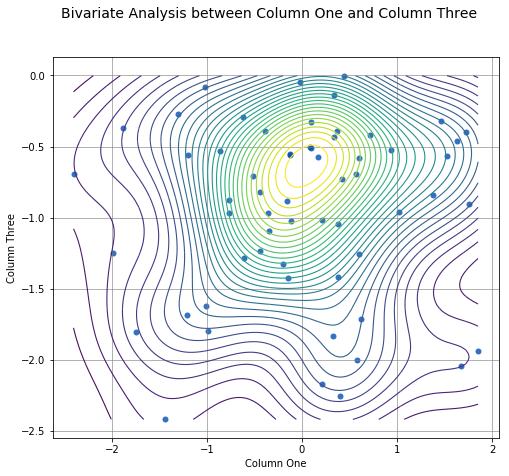



Linear Regression
-----------------

n         =  60
Slope     =  0.0281
Intercept = -0.9407
r         =  0.0449
r^2       =  0.0020
Std Err   =  0.0820
p value   =  0.7332



Spearman Correlation Coefficient
--------------------------------

alpha   =  0.0500
r value =  0.0316
p value =  0.8105

H0: There is no significant relationship between predictor and response



In [13]:
analyze(
    df['One'], 
    df['Three'], 
    xname='Column One', 
    yname='Column Three',
    contours=True,
    fit=False,
    title='Bivariate Analysis between Column One and Column Three'
)

With a few point below -2.0, it might be useful to know which data point they are. This can be done by passing the **ID** column to the `labels` argument and then selecting which labels to highlight with the `highlight` argument: 

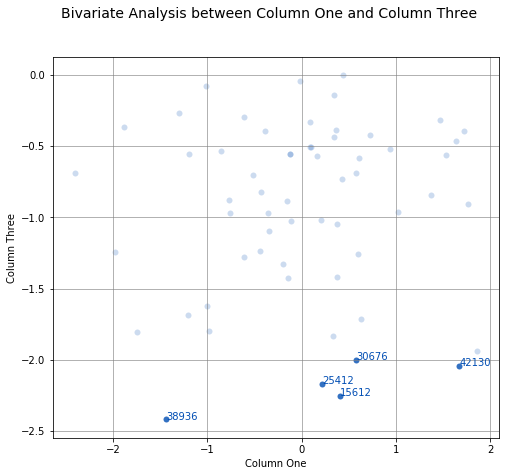



Linear Regression
-----------------

n         =  60
Slope     =  0.0281
Intercept = -0.9407
r         =  0.0449
r^2       =  0.0020
Std Err   =  0.0820
p value   =  0.7332



Spearman Correlation Coefficient
--------------------------------

alpha   =  0.0500
r value =  0.0316
p value =  0.8105

H0: There is no significant relationship between predictor and response



In [14]:
analyze(
    df['One'], 
    df['Three'], 
    labels=df['ID'],
    highlight=df[df['Three'] < -2.0]['ID'],
    fit=False,
    xname='Column One', 
    yname='Column Three', 
    title='Bivariate Analysis between Column One and Column Three'
)

To check whether an individual **Condition** correlates between Column **One** and Column **Three**, the same analysis can be done, but this time by passing the **Condition** column to the groups argument. For example:

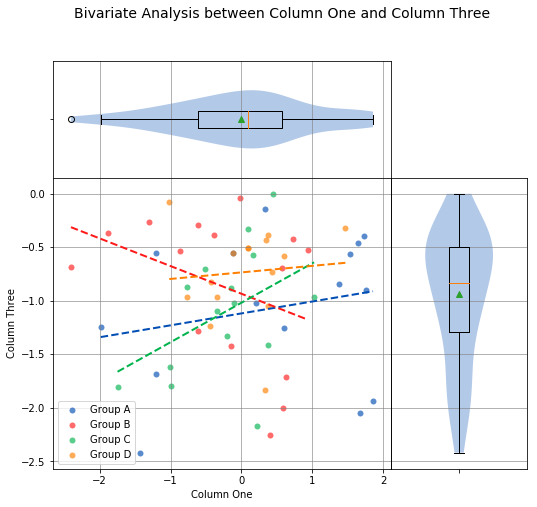



Linear Regression
-----------------

n             Slope         Intercept     r^2           Std Err       p value       Group         
--------------------------------------------------------------------------------------------------
15             0.1113       -1.1181        0.0487        0.1364        0.4293       Group A       
15            -0.2586       -0.9348        0.1392        0.1784        0.1708       Group B       
15             0.3688       -1.0182        0.1869        0.2134        0.1076       Group C       
15             0.0611       -0.7352        0.0075        0.1952        0.7591       Group D       


Spearman Correlation Coefficient
--------------------------------

n             r value       p value       Group         
--------------------------------------------------------
15             0.1357        0.6296       Group A       
15            -0.3643        0.1819       Group B       
15             0.3714        0.1728       Group C       
15           

In [15]:
analyze(
    df['One'], 
    df['Three'],
    xname='Column One',
    yname='Column Three',
    groups=df['Condition'],
    title='Bivariate Analysis between Column One and Column Three'
)

The borders of the graph have boxplots for all the data points on the x-axis and y-axis, regardless of which group they belong to. The borders can be removed by adding the argument ``boxplot_borders=False``.

According to the Spearman Correlation, there is no significant correlation among the groups. Group B is the only group with a negative slope, but it can be difficult to see the data points for Group B with so many colors on the graph. The Group B data points can be highlighted by using the argument ``highlight=['Group B']``. In fact, any number of groups can be highlighted by passing a list of the group names using the ``highlight`` argument.

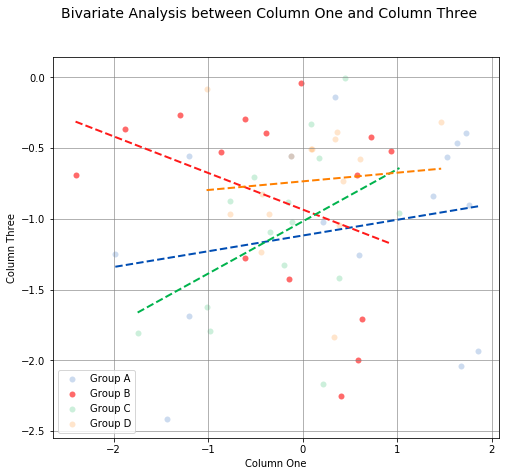



Linear Regression
-----------------

n             Slope         Intercept     r^2           Std Err       p value       Group         
--------------------------------------------------------------------------------------------------
15             0.1113       -1.1181        0.0487        0.1364        0.4293       Group A       
15            -0.2586       -0.9348        0.1392        0.1784        0.1708       Group B       
15             0.3688       -1.0182        0.1869        0.2134        0.1076       Group C       
15             0.0611       -0.7352        0.0075        0.1952        0.7591       Group D       


Spearman Correlation Coefficient
--------------------------------

n             r value       p value       Group         
--------------------------------------------------------
15             0.1357        0.6296       Group A       
15            -0.3643        0.1819       Group B       
15             0.3714        0.1728       Group C       
15           

In [16]:
analyze(
    df['One'], 
    df['Three'],
    xname='Column One',
    yname='Column Three',
    groups=df['Condition'],
    boxplot_borders=False,
    highlight=['Group B'],
    title='Bivariate Analysis between Column One and Column Three'
)

Performing a location test on data in a pandas DataFrame requires some explanation. A location test can be performed with stacked or unstacked data. One method will be easier than the other depending on how the data to be analyzed is stored. In the example DataFrame used so far, to perform a location test between the groups in the **Condition** column, the stacked method will be easier to use. 

Let's start with an example. The following code will perform a location test using each of the four values in the **Condition** column:

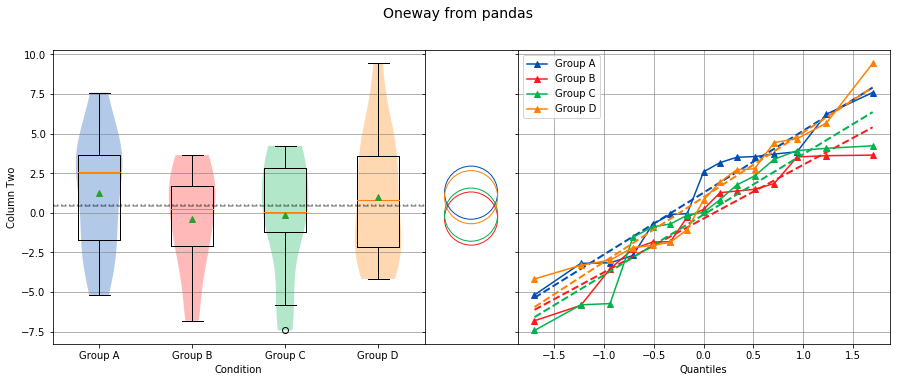



Overall Statistics
------------------

Number of Groups =  4
Total            =  60
Grand Mean       =  0.4456
Pooled Std Dev   =  3.6841
Grand Median     =  0.5138


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
15             1.2712        3.7471       -5.1767        2.5874        7.5816       Group A       
15            -0.3616        3.2792       -6.8034        0.2217        3.6384       Group B       
15            -0.1135        3.7338       -7.4153        0.0224        4.2242       Group C       
15             0.9864        3.9441       -4.1688        0.8059        9.4199       Group D       


Bartlett Test
-------------

alpha   =  0.0500
T value =  0.4868
p value =  0.9218

H0: Variances are equal



Oneway ANOVA
------------

alpha   =  0.0500
f value =  0.7140
p value =  0.5477

H0: Gro

In [17]:
analyze(
    df['Two'], 
    groups=df['Condition'],
    categories='Condition',
    name='Column Two',
    title='Oneway from pandas'
)

From the graph, there are four groups: Group A, Group B, Group C and Group D in Column **Two**. The analysis shows that the variances are equal and there is no significant difference in the means. Noting the tests that are being performed, the Bartlett test is being used to check for equal variance because all four groups are normally distributed, and the Oneway ANOVA is being used to test if all means are equal because all four groups are normally distributed and the variances are equal. However, if not all the groups are normally distributed, the Levene Test will be used to check for equal variance instead of the Bartlett Test. Also, if the groups are not normally distributed or the variances are not equal, the Kruskal-Wallis test will be used instead of the Oneway ANOVA.

If instead the four columns **One**, **Two**, **Three** and **Four** are to be analyzed, the easier way to perform the analysis is with the unstacked method. The following code will perform a location test of the four columns:

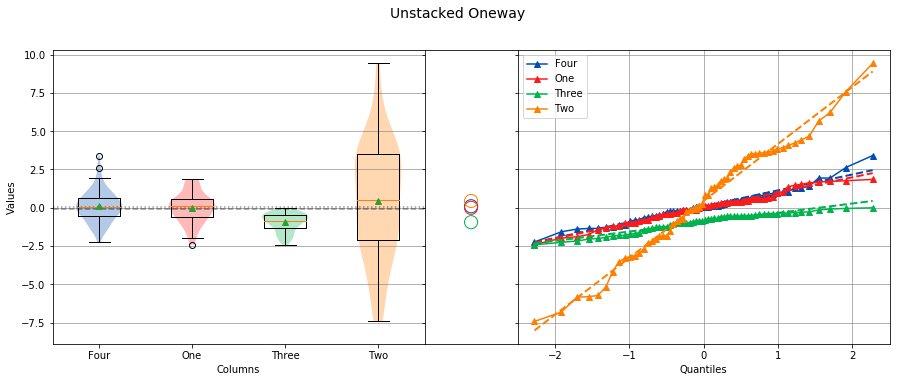



Overall Statistics
------------------

Number of Groups =  4
Total            =  240
Grand Mean       = -0.0995
Pooled Std Dev   =  1.9859
Grand Median     =  0.0752


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
60             0.1007        1.0294       -2.2349        0.0621        3.4087       Four          
60            -0.0035        0.9815       -2.4036        0.0882        1.8537       One           
60            -0.9408        0.6133       -2.4177       -0.8318       -0.0015       Three         
60             0.4456        3.6572       -7.4153        0.5138        9.4199       Two           


Levene Test
-----------

alpha   =  0.0500
W value =  64.7684
p value =  0.0000

HA: Variances are not equal



Kruskal-Wallis
--------------

alpha   =  0.0500
h value =  33.8441
p value =  0.0000



In [18]:
analyze(
    [df['One'], df['Two'], df['Three'], df['Four']], 
    groups=['One', 'Two', 'Three', 'Four'],
    categories='Columns',
    title='Unstacked Oneway'
)

To perform a location test using the unstacked method, the columns to be analyzed are passed in a list or tuple, and the groups argument needs to be a list or tuple of the group names. One thing to note is that the groups argument was used to explicitly define the group names. This will only work if the group names and order are known in advance. If they are unknown, a dictionary comprehension can be used instead of a list comprehension to to get the group names along with the data:

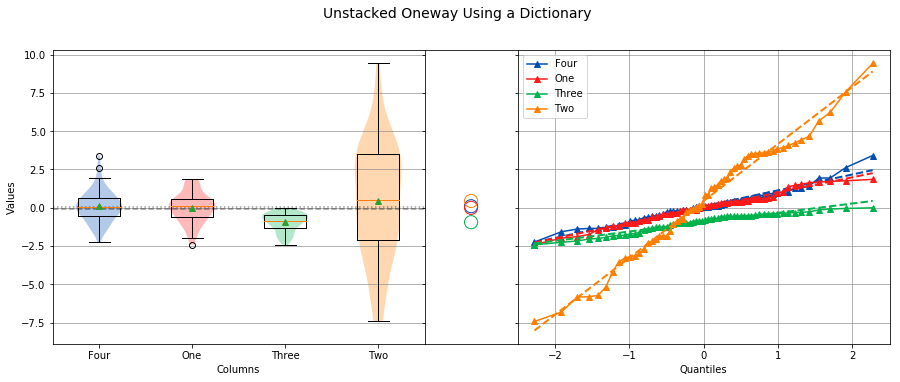



Overall Statistics
------------------

Number of Groups =  4
Total            =  240
Grand Mean       = -0.0995
Pooled Std Dev   =  1.9859
Grand Median     =  0.0752


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
60             0.1007        1.0294       -2.2349        0.0621        3.4087       Four          
60            -0.0035        0.9815       -2.4036        0.0882        1.8537       One           
60            -0.9408        0.6133       -2.4177       -0.8318       -0.0015       Three         
60             0.4456        3.6572       -7.4153        0.5138        9.4199       Two           


Levene Test
-----------

alpha   =  0.0500
W value =  64.7684
p value =  0.0000

HA: Variances are not equal



Kruskal-Wallis
--------------

alpha   =  0.0500
h value =  33.8441
p value =  0.0000



In [19]:
analyze(
    {'One': df['One'], 'Two': df['Two'], 'Three': df['Three'], 'Four': df['Four']}, 
    categories='Columns',
    title='Unstacked Oneway Using a Dictionary'
)

The output will be identical to the previous example. The analysis also shows that the variances are not equal, and the means are not matched. Also, because the data in column **Three** is not normally distributed, the Levene Test is used to test for equal variance instead of the Bartlett Test, and the Kruskal-Wallis Test is used instead of the Oneway ANOVA.

With pandas, it's possible to perform advanced aggregation and filtering functions using the GroupBy object's ``apply()`` method. Since the sample sizes were small for each month in the above examples, it might be helpful to group the data by annual quarters instead. First, let's create a function that adds a column called **Quarter** to the DataFrame where the value is either Q1, Q2, Q3 or Q4 depending on the month.

In [20]:
def set_quarter(data):
    month = data['Month']
    if month.all() in ('Jan', 'Feb', 'Mar'):
        quarter = 'Q1'
    elif month.all() in ('Apr', 'May', 'Jun'):
        quarter = 'Q2'
    elif month.all() in ('Jul', 'Aug', 'Sep'):
        quarter = 'Q3'
    elif month.all() in ('Oct', 'Nov', 'Dec'):
        quarter = 'Q4'
    else:
        quarter = 'Unknown'
    data.loc[:, 'Quarter'] = quarter
    return data

This function will take a GroupBy object called *data*, where *data*'s DataFrame object was grouped by month, and set the variable *quarter* based off the month. Then, a new column called **Quarter** is added to *data* where the value of each row is equal to *quarter*. Finally, the resulting DataFrame object is returned.

Using the new function is simple. The same techniques from previous examples are used, but this time, a new DataFrame object called *df2* is created by first grouping by the **Month** column then calling the ``apply()`` method which will run the ``set_quarter()`` function.

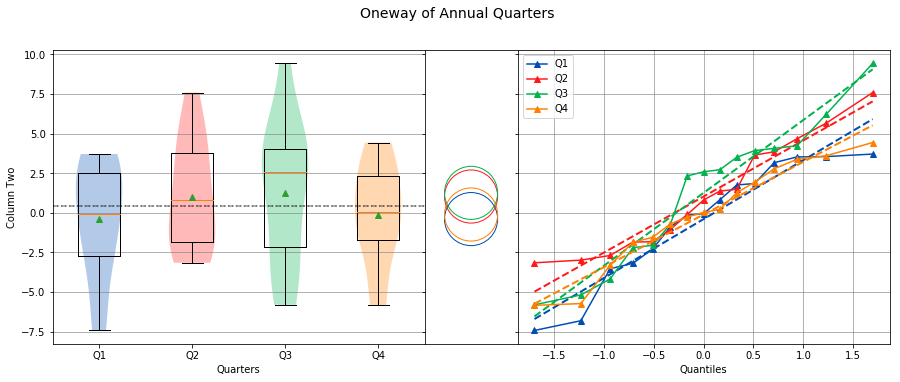



Overall Statistics
------------------

Number of Groups =  4
Total            =  60
Grand Mean       =  0.4456
Pooled Std Dev   =  3.6815
Grand Median     =  0.4141


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
15            -0.3956        3.6190       -7.4153       -0.0510        3.7046       Q1            
15             1.0271        3.4028       -3.1509        0.8059        7.5816       Q2            
15             1.2577        4.4120       -5.8003        2.5874        9.4199       Q3            
15            -0.1067        3.1736       -5.8342        0.0224        4.4318       Q4            


Bartlett Test
-------------

alpha   =  0.0500
T value =  1.7209
p value =  0.6323

H0: Variances are equal



Oneway ANOVA
------------

alpha   =  0.0500
f value =  0.7416
p value =  0.5318

H0: Gro

In [21]:
quarters = ('Q1', 'Q2', 'Q3', 'Q4')
df2 = df.groupby(df['Month']).apply(set_quarter)
data = {quarter: data['Two'] for quarter, data in df2.groupby(df2['Quarter'])}
analyze(
    [data[quarter] for quarter in quarters],
    groups=quarters,
    categories='Quarters',
    name='Column Two',
    title='Oneway of Annual Quarters'
)